### 필요한 라이브러리 설치
    * sklearn
    * pandas
    * numpy
    * matplotlib
    * seaborn
    * statsmodels
    * scipy

** 이미 설치 되어 있으면 해당 과정 생략

In [ ]:
import os, sys
from google.colab import drive
drive.mount('/content/drive')

my_path = '/content/notebooks'
# Colab Notebooks 안에 my_env 폴더에 패키지 저장
os.symlink('/content/drive/My Drive/Colab Notebooks/my_env', my_path)
sys.path.insert(0, my_path)

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install --target=$my_path sklearn
!pip install --target=$my_path pandas
!pip install --target=$my_path numpy
!pip install --target=$my_path matplotlib
!pip install --target=$my_path seaborn
!pip install --target=$my_path statsmodels
!pip install --target=$my_path scipy

## Exercise 1

### Performance evaluation function for regression

* RMSE (Root Mean Squared Error)  

    $\sqrt{{1 \over N} \sum^N_{i=1}{(y^i_{true} - y^i_{pred})^2}}$

* MAE (Mean Absolute Error)  

    ${1 \over N} \sum^N_{i=1}{|y^i_{true} - y^i_{pred}|}$

* MAPE (Mean Absolute Percentage Error)  

    ${1 \over N} \sum^N_{i=1}{|{y^i_{true} - y^i_{pred} \over y^i_{true}}|}$


In [ ]:
from typing import Union
import numpy as np
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_absolute_percentage_error as MAPE


def perf_eval_reg(y_true: Union[np.array,list], y_pred: Union[np.array,list])->list:
    """
    Input:
    y_true : ndarray of shape (n_samples,)
    y_pred : ndarray of shape (n_samples,)

    Return:
    [rmse,mae,mape]: scores of regression in a list
    """
    
    rmse = MSE(y_true,y_pred,squared=False)#squared를 True로 설정시 MSE 값 출력, False로 설정시 RMSE 값 출력
    mae = MAE(y_true,y_pred)
    mape = MAPE(y_true,y_pred)

    return [rmse,mae,mape]

### Intialize a performance summary table

* R에서는 table 형태로 다루어졌음  
* Python에서는 dictionary로 결과를 저장하고 결과 확인 시 DataFrame으로 출력

In [ ]:
import pandas as pd

def display_result(result_dict: dict, dataset_names: list, metric_names: list):
    """
    Input:
    result_dict : 데이터 셋 별 Regression 평가 결과 저장한 dictionary
    ex) {'Toyota Corolla':[0.1,0.5,0.3],...}
    
    dataset_names : 데이터 셋 이름 List
    ex) ['Toyota Corolla','Boston Housing']

    metric_names : Regression 평가 지표 이름 List
    ex) ['RMSE','MAE','MAPE']
    """
    result_df = pd.DataFrame(result_dict).T
    result_df.index = dataset_names
    result_df.columns = metric_names
    
    display(result_df)

result_dict= {}

### Load Data: Game Sales

In [ ]:
sales = pd.read_csv("/content/drive/MyDrive/수업/4학년/1학기/다변량분석/과제_다변량/Video_Games_Sales_as_at_22_Dec_2016.csv")
display(sales.head(5))

# Indices for the activated input variables 
nCar = len(sales.index)
nVar = len(sales.columns)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Check some data
sales.iloc[[36, 37],[0, 14]]

,Name,Developer
36,Call of Duty: Modern Warfare 2,Infinity Ward
37,Call of Duty: Modern Warfare 3,"Infinity Ward, Sledgehammer Games"


In [ ]:
# Remove Null and unnecessary variables
p_sales = sales.dropna()
p_sales['User_Score'] = p_sales['User_Score'].astype(float)

total_variable_idx = [i for i in range(nVar)]
removal_variable_idx = [0, 5, 6, 7, 8, 14]
selected_variable_idx = list(set(total_variable_idx)- set(removal_variable_idx))
p_sales = p_sales.iloc[:,selected_variable_idx]
display(p_sales)

<ipython-input-6-4335f47fb604>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_sales['User_Score'] = p_sales['User_Score'].astype(float)


,Platform,Year_of_Release,Genre,Publisher,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii,2006.0,Sports,Nintendo,82.53,76.0,51.0,8.0,322.0,E
2,Wii,2008.0,Racing,Nintendo,35.52,82.0,73.0,8.3,709.0,E
3,Wii,2009.0,Sports,Nintendo,32.77,80.0,73.0,8.0,192.0,E
6,DS,2006.0,Platform,Nintendo,29.80,89.0,65.0,8.5,431.0,E
7,Wii,2006.0,Misc,Nintendo,28.92,58.0,41.0,6.6,129.0,E
...,...,...,...,...,...,...,...,...,...,...
16667,GBA,2001.0,Action,NewKidCo,0.01,46.0,4.0,2.4,21.0,E
16677,GBA,2002.0,Fighting,Midway Games,0.01,81.0,12.0,8.8,9.0,M
16696,PC,2014.0,Action,Konami Digital Entertainment,0.01,80.0,20.0,7.6,412.0,M
16700,PC,2011.0,Shooter,Destineer,0.01,61.0,12.0,5.8,43.0,T


###Univariate Statistics and Box Plot
* 각 입력 변수의 Mean, Standard deviation, Skewness, Kurtosis 구하기
* Box Plot 도시

In [ ]:
# Univariate Statistics
from scipy.stats import skew, kurtosis

df = pd.DataFrame(columns = ['Attribute', 'mean','std','skewness', 'kurtosis'])


def uni_stats(x):

  # 평균
  avg = x.mean()
  # 표준 편차
  std = x.std()

  # 첨도
  kurto = kurtosis(x)
  # 왜도
  skewness = skew(x)

  
  return avg, std, kurto, skewness

df.loc[0] = ['Year_of_Release'] + list(uni_stats(p_sales['Year_of_Release']))
df.loc[1] = ['Critic_Score'] + list(uni_stats(p_sales['Critic_Score']))
df.loc[2] = ['Critic_Count'] + list(uni_stats(p_sales['Critic_Count']))
df.loc[3] = ['User_Score'] + list(uni_stats(p_sales['User_Score']))
df.loc[4] = ['User_Count'] + list(uni_stats(p_sales['User_Count']))

df

,Attribute,mean,std,skewness,kurtosis
0,Year_of_Release,2007.436777,4.211248,-0.518370,0.110819
1,Critic_Score,70.272088,13.868572,0.394749,-0.745604
2,Critic_Count,28.931136,19.224165,0.732260,1.030652
3,User_Score,7.185626,1.439942,1.610710,-1.219081
4,User_Count,174.722344,587.428538,103.096429,8.665041


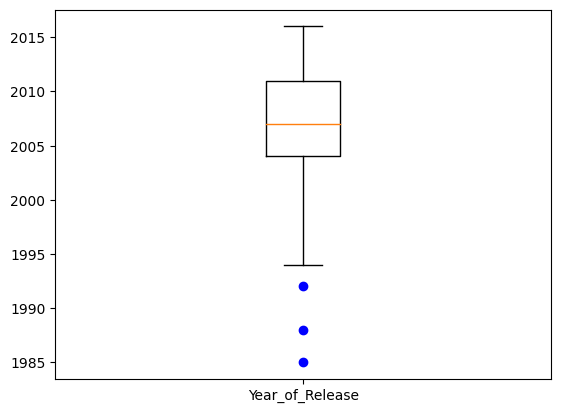

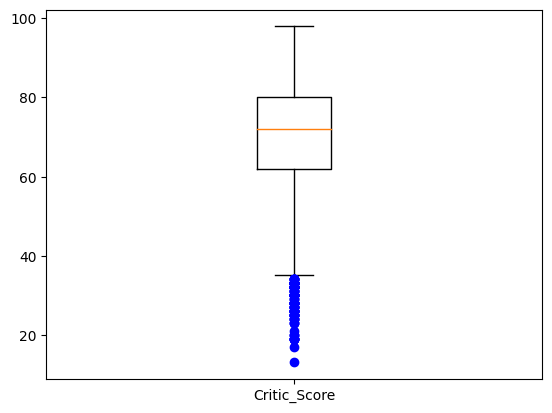

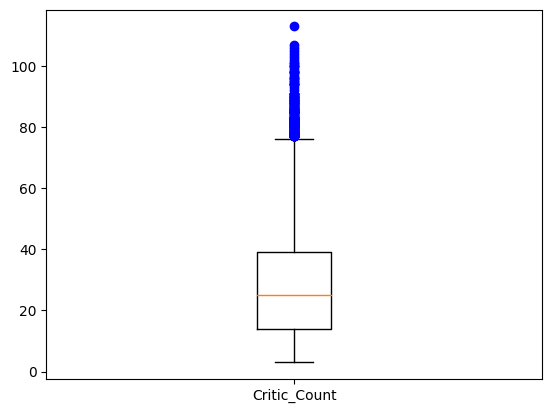

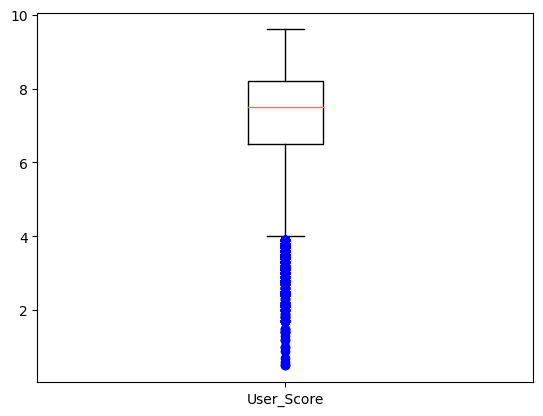

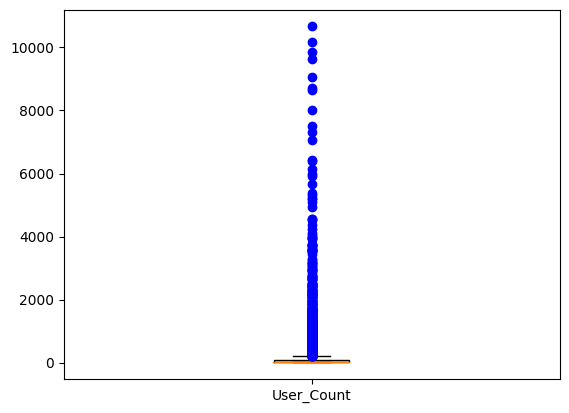

In [ ]:
# Box Plot
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

def box_p(att):
  plt.boxplot(p_sales[att], sym="bo")
  plt.xticks([1], [att])
  plt.show()

box_p('Year_of_Release')
box_p('Critic_Score')
box_p('Critic_Count')
box_p('User_Score')
box_p('User_Count')


###Define outliers and remove them

In [ ]:
def det_out(df, att, replace):
  q1=df[att].quantile(0.25)
  q3=df[att].quantile(0.75)
  iqr=q3-q1

  upper=df[att]>(q3+1.5*iqr)
  lower=df[att]<(q1-1.5*iqr)
  a = df[upper].index
  b = df[lower].index
  c = a.tolist() + b.tolist()
  if replace:
    df.drop(c,inplace=True)
    return df
  else:
    new = df.drop(c,inplace=False)
    return new

In [ ]:
det_out(p_sales, 'Year_of_Release', True)
det_out(p_sales, 'Critic_Score', True)
det_out(p_sales, 'Critic_Count', True)
det_out(p_sales, 'User_Score', True)
det_out(p_sales, 'User_Count', True)
p_sales

,Platform,Year_of_Release,Genre,Publisher,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
7,Wii,2006.0,Misc,Nintendo,28.92,58.0,41.0,6.6,129.0,E
13,Wii,2007.0,Sports,Nintendo,22.70,80.0,63.0,7.7,146.0,E
14,X360,2010.0,Misc,Microsoft Game Studios,21.81,61.0,45.0,6.3,106.0,E
15,Wii,2009.0,Sports,Nintendo,21.79,80.0,33.0,7.4,52.0,E
19,DS,2005.0,Misc,Nintendo,20.15,77.0,58.0,7.9,50.0,E
...,...,...,...,...,...,...,...,...,...,...
16634,XOne,2016.0,Racing,Milestone S.r.l,0.01,63.0,8.0,8.2,22.0,E
16656,WiiU,2016.0,Action,Nintendo,0.01,81.0,46.0,8.5,151.0,E
16677,GBA,2002.0,Fighting,Midway Games,0.01,81.0,12.0,8.8,9.0,M
16700,PC,2011.0,Shooter,Destineer,0.01,61.0,12.0,5.8,43.0,T


###Scatter plot

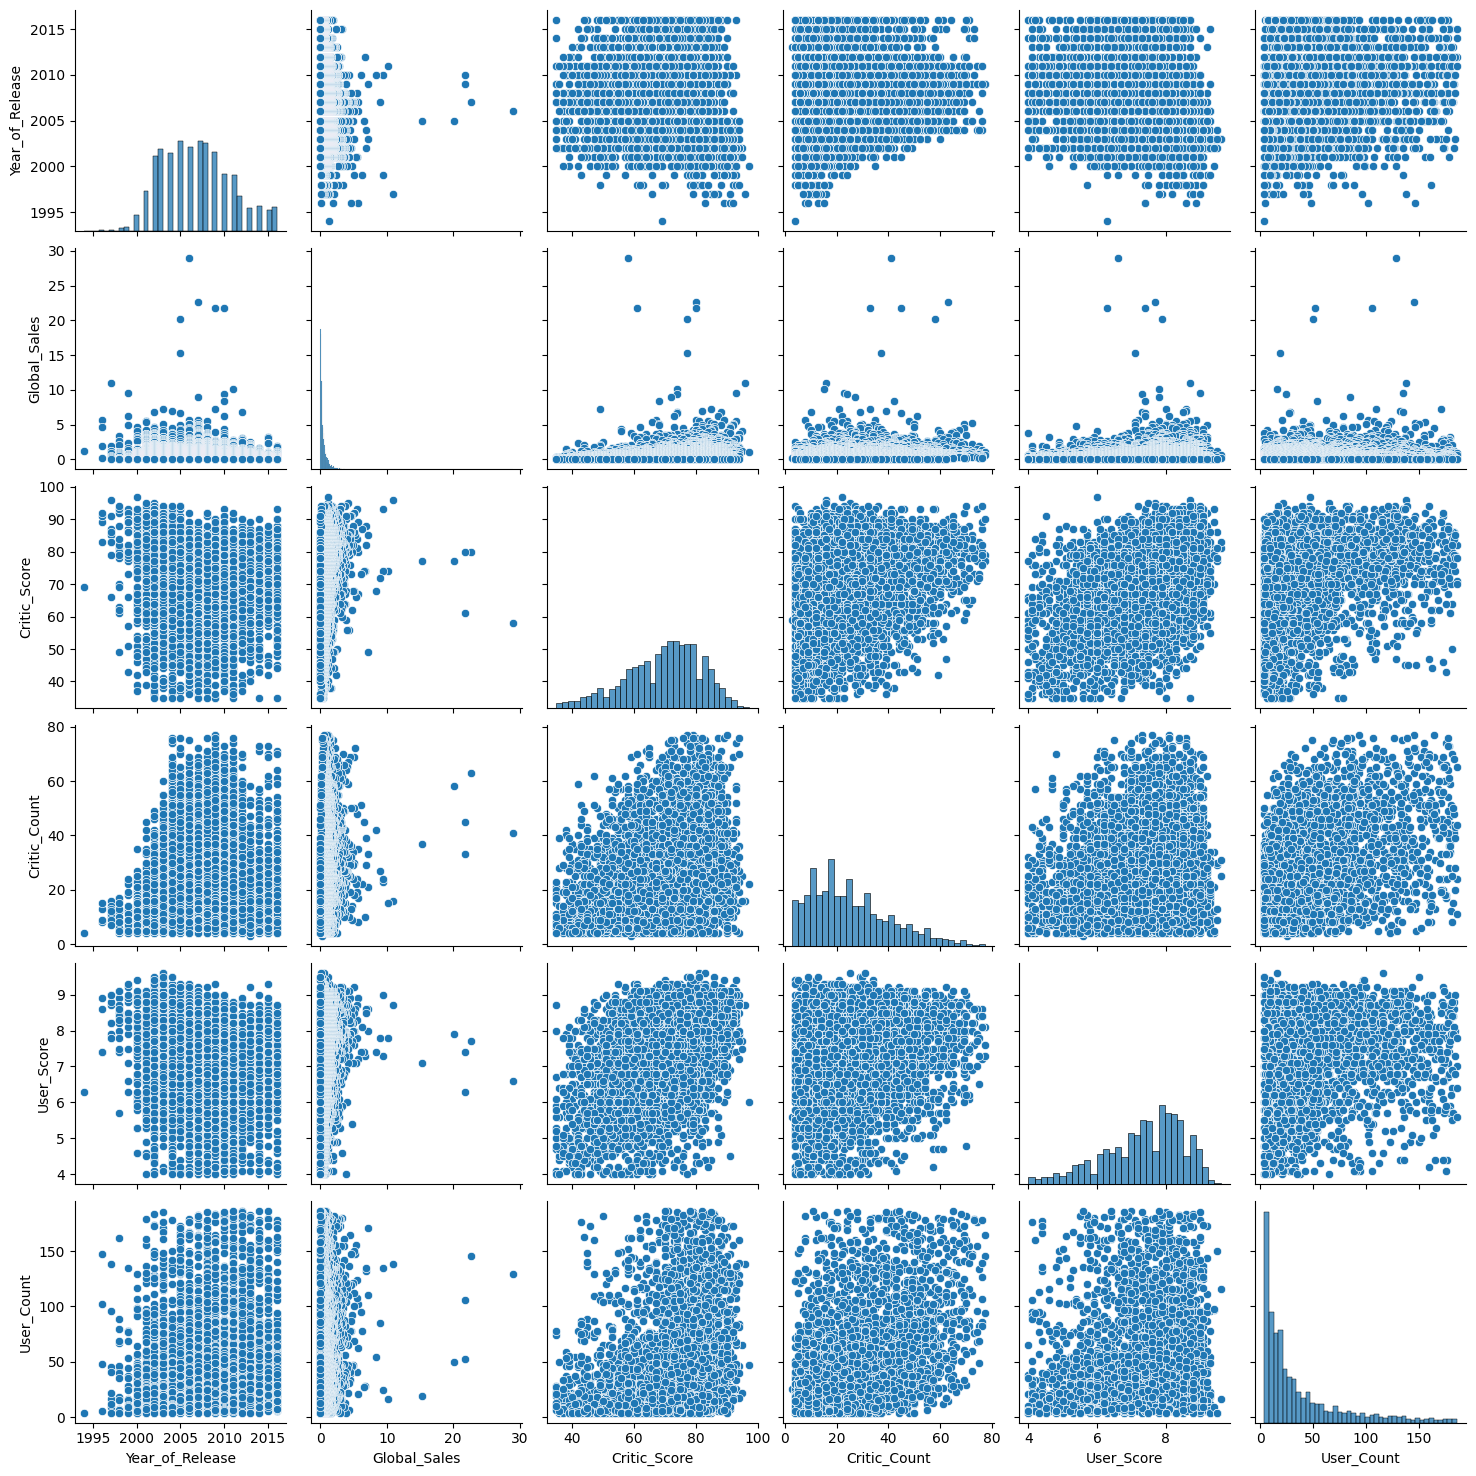

In [ ]:
import seaborn as sns
sns.pairplot(p_sales)

<ipython-input-12-f90106a391ac>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = p_sales.corr().round(2)


<Axes: >

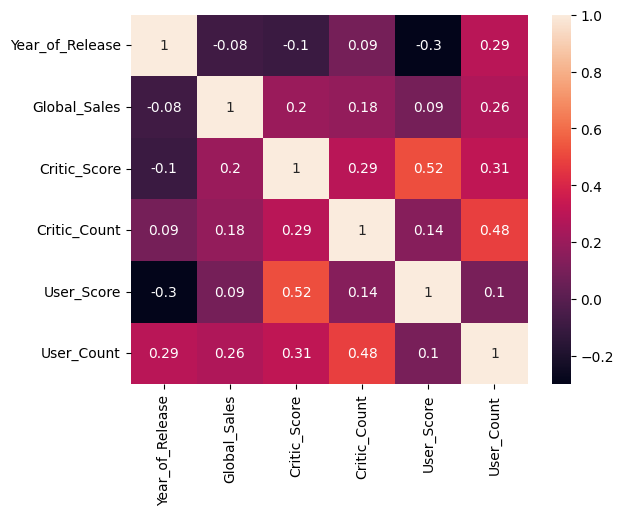

In [ ]:
cor = p_sales.corr().round(2)
sns.heatmap(cor, annot = True)

###Data Preparation
* Data preprocessing: 1-of-C coding
  * 변수 중 명목형(categorical) 변수를 1-of-C coding을 통해 벡터 형태로 변환
  * Dataframe의 unique 함수를 통해 실제 항목의 종류와 종류 별 데이터 샘플 개수 확인
* Combine
    * 앞서 만든 binary variable을 기존의 데이터 셋과 병합
    * 기존의 명목형 변수 제거
    * DataFrame 상 변수의 위치 이용하여 제거  
    
* Split
    * 학습용:검증용 = 7:3의 비율로 구분
    * seed를 고정시킨 후 sklearn의 train_test_split 함수 이용

In [ ]:
# Data preprocessing

nCar = len(p_sales.index)
nVar = len(p_sales.columns)


def tovec(att):
  uniatt = p_sales[att].unique()
  temp = {}
  for i in range(len(uniatt)-1):
    globals()['dummy_{}_{}'.format(att,i)]= np.array([0]*len(p_sales))
    globals()['{}_idx_{}'.format(att, i)] = p_sales[att] == uniatt[i]
    globals()['dummy_{}_{}'.format(att,i)][globals()['{}_idx_{}'.format(att, i)]] = 1
    temp[uniatt[i]] = globals()['dummy_{}_{}'.format(att,i)]
  return temp


In [ ]:
# Combine

# Input Variable Removal
selected_variable_idx = [i for i in range(nVar)]
bi_variable_idx = [0, 2, 3, 9]
final_variable_idx =list(set(selected_variable_idx)-set(bi_variable_idx))

# Preparing binary variables
Platform = pd.DataFrame(tovec('Platform'))
Genre = pd.DataFrame(tovec('Genre'))
Publisher = pd.DataFrame(tovec('Publisher'))
Rating = pd.DataFrame(tovec('Rating'))

# Matching indices
p_sales.reset_index(drop=True, inplace=True)
Platform.reset_index(drop=True, inplace=True)
Genre.reset_index(drop=True, inplace=True)
Publisher.reset_index(drop=True, inplace=True)
Rating.reset_index(drop=True, inplace=True)

# Prepare the data for MLR 
sales_mlr_data = pd.concat((p_sales.iloc[:,final_variable_idx],Platform,Genre,Publisher,Rating),axis=1)
temp = pd.concat((sales_mlr_data.iloc[:,[1]], sales_mlr_data.iloc[:,[0]],sales_mlr_data.iloc[:,2:]), axis=1)
sales_mlr_data = temp.loc[:, (temp != 0).any(axis=0)]
pd.set_option('display.max_rows', 6)
sales_mlr_data

,Global_Sales,Year_of_Release,Critic_Score,Critic_Count,User_Score,User_Count,Wii,X360,DS,PS,...,Yacht Club Games,CDV Software Entertainment,Encore,Blue Byte,E,E10+,T,M,AO,K-A
0,28.92,2006.0,58.0,41.0,6.6,129.0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,22.70,2007.0,80.0,63.0,7.7,146.0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,21.81,2010.0,61.0,45.0,6.3,106.0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5501,0.01,2002.0,81.0,12.0,8.8,9.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5502,0.01,2011.0,61.0,12.0,5.8,43.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5503,0.01,2011.0,60.0,12.0,7.2,13.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
# Split
from sklearn.model_selection import train_test_split
seed = 12345
test_size = 0.3
sales_trn_data, sales_valid_data = train_test_split(sales_mlr_data,test_size=test_size,random_state=seed)

### Training the model

* Linear regression model from sklearn.linear_models [[Docs]('https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model)]
* LinearRegression은 별도의 arguments 설정 없이 진행하는 편
* scikit-learn의 모델의 입력 값 형태는 주로 numpy array로 설정
* 입력 변수, 출력 변수 구분

   

In [ ]:
# input, output variables in numpy array

x_trn = sales_trn_data.iloc[:,1:].to_numpy()
y_trn = sales_trn_data.loc[:,'Global_Sales'].to_numpy()


In [ ]:
# model setting
from sklearn.linear_model import LinearRegression

mlr = LinearRegression()

# Train the model with trainset
mlr.fit(x_trn,y_trn)

# Get R-squared value
mlr.score(x_trn,y_trn)

# Calculate Adjusted R_squared value
adr2 = 1-(1-mlr.score(x_trn,y_trn))*(x_trn.shape[0] - 1)/(x_trn.shape[0] - x_trn.shape[1]- 1)
adr2


0.18972278998762504

### Interpret the result
* Scikit-learn에 있는 여러 모델은 R의 glm 라이브러리와 다르게 잔차분석에 대한 함수가 존재하지 않음
* 이에 따라 잔차분석을 수행하는 코드를 작성하여 확인해야 함
* 다음의 링크에서 이와 관련된 코드를 설명해주고 있음 [[Here](https://jeffmacaluso.github.io/post/LinearRegressionAssumptions/)]

In [ ]:
# calculate residuals
def calculate_residuals(model, features, label):
    """
    Creates predictions on the features with the model and calculates residuals
    """
    predictions = model.predict(features)
    df_results = pd.DataFrame({'Actual': label, 'Predicted': predictions})
    df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])
    
    return df_results

Assumption : Linear Relationship between the Target and the Feature 

Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


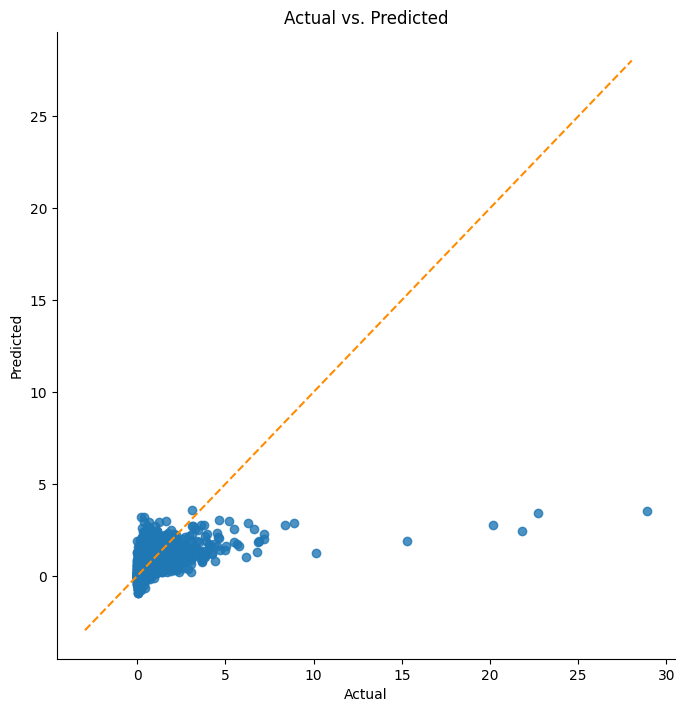

In [ ]:
# Linear assumption
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
def linear_assumption(model, features, label):
    """
    Linearity: Assumes that there is a linear relationship between the predictors and
               the response variable. If not, either a quadratic term or another
               algorithm should be used.
    """
    print('Assumption : Linear Relationship between the Target and the Feature', '\n')
        
    print('Checking with a scatter plot of actual vs. predicted.',
           'Predictions should follow the diagonal line.')
    
    # Calculating residuals for the plot
    df_results = calculate_residuals(model, features, label)
    
    # Plotting the actual vs predicted values
    sns.lmplot(x='Actual', y='Predicted', data=df_results, fit_reg=False, height=7)
        
    # Plotting the diagonal line
    line_coords = np.arange(df_results.min().min(), df_results.max().max())
    plt.plot(line_coords, line_coords,  # X and y points
             color='darkorange', linestyle='--')
    plt.title('Actual vs. Predicted')
    plt.show()
linear_assumption(mlr,x_trn,y_trn)

Assumption : The error terms are normally distributed 

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 0.0
Residuals are not normally distributed


/content/notebooks/statsmodels/stats/_adnorm.py:70: RuntimeWarning: divide by zero encountered in log1p
  s = np.sum((2 * i[sl1] - 1.0) / nobs * (np.log(z) + np.log1p(-z[sl2])),
<ipython-input-77-c2618e6455be>:31: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_results['Residuals'])


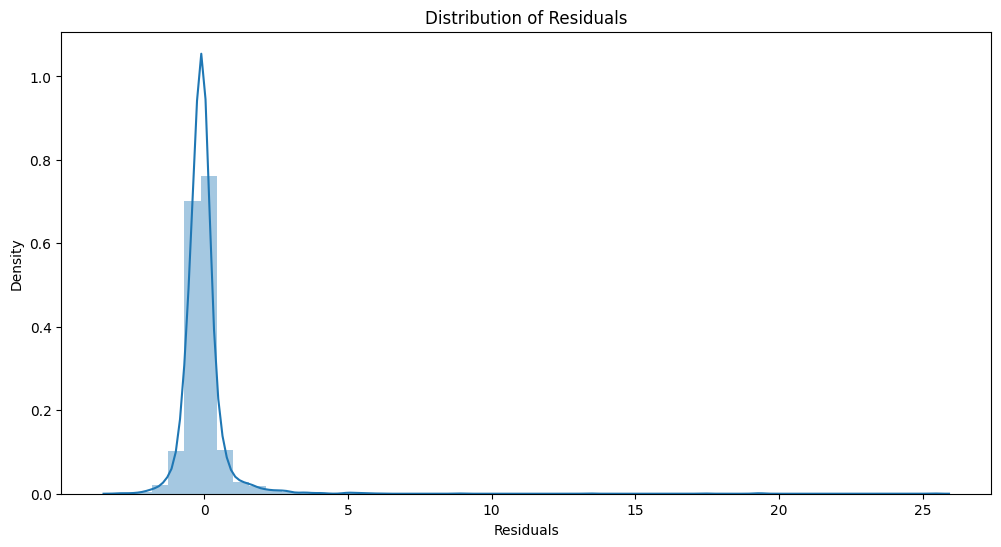


Assumption not satisfied

Confidence intervals will likely be affected
Try performing nonlinear transformations on variables


In [ ]:
# Noramlity of the error terms

def normal_errors_assumption(model, features, label, p_value_thresh=0.05):
    """
    Normality: Assumes that the error terms are normally distributed. If they are not,
    nonlinear transformations of variables may solve this.
               
    This assumption being violated primarily causes issues with the confidence intervals
    """
    from statsmodels.stats.diagnostic import normal_ad
    print('Assumption : The error terms are normally distributed', '\n')
    
    # Calculating residuals for the Anderson-Darling test
    df_results = calculate_residuals(model, features, label)
    
    print('Using the Anderson-Darling test for normal distribution')

    # Performing the test on the residuals
    p_value = normal_ad(df_results['Residuals'])[1]
    print('p-value from the test - below 0.05 generally means non-normal:', p_value)
    
    # Reporting the normality of the residuals
    if p_value < p_value_thresh:
        print('Residuals are not normally distributed')
    else:
        print('Residuals are normally distributed')
    
    # Plotting the residuals distribution
    plt.subplots(figsize=(12, 6))
    plt.title('Distribution of Residuals')
    sns.distplot(df_results['Residuals'])
    plt.show()
    
    print()
    if p_value > p_value_thresh:
        print('Assumption satisfied')
    else:
        print('Assumption not satisfied')
        print()
        print('Confidence intervals will likely be affected')
        print('Try performing nonlinear transformations on variables')

normal_errors_assumption(mlr,x_trn,y_trn)

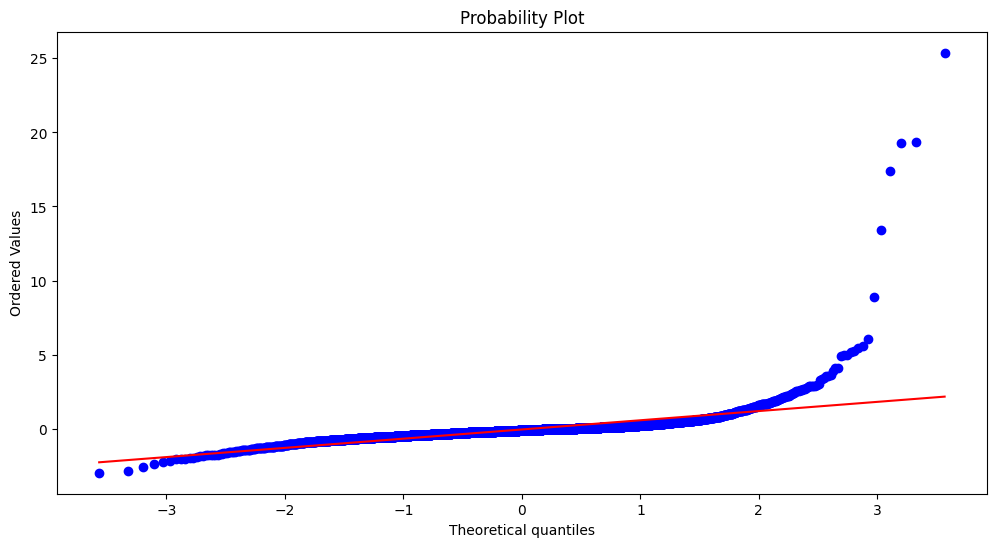

In [ ]:
# QQPlot
import scipy.stats as stats

def QQplot(model,features,label):
    """
    Normality using QQplot
    """
    
    # Calculating residuals for the Anderson-Darling test
    df_results = calculate_residuals(model, features, label)
    
    # Plotting the residuals distribution
    plt.subplots(figsize=(12, 6))
    plt.title('QQplot')
    stats.probplot(df_results['Residuals'],dist=stats.norm, plot=plt)
    plt.show()

QQplot(mlr, x_trn,y_trn)


In [ ]:
# No autocorrelation of the error terms

def autocorrelation_assumption(model, features, label):
    """
    Autocorrelation: Assumes that there is no autocorrelation in the residuals. If there is
                     autocorrelation, then there is a pattern that is not explained due to
                     the current value being dependent on the previous value.
                     This may be resolved by adding a lag variable of either the dependent
                     variable or some of the predictors.
    """
    from statsmodels.stats.stattools import durbin_watson
    print('Assumption : No Autocorrelation in the residuals', '\n')
    
    # Calculating residuals for the Durbin Watson-tests
    df_results = calculate_residuals(model, features, label)

    print('\nPerforming Durbin-Watson Test')
    print('Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data')
    print('0 to 2< is positive autocorrelation')
    print('>2 to 4 is negative autocorrelation')
    print('-------------------------------------')
    durbinWatson = durbin_watson(df_results['Residuals'])
    print('Durbin-Watson:', durbinWatson)
    if durbinWatson < 1.5:
        print('Signs of positive autocorrelation', '\n')
        print('Assumption not satisfied')
    elif durbinWatson > 2.5:
        print('Signs of negative autocorrelation', '\n')
        print('Assumption not satisfied')
    else:
        print('Little to no autocorrelation', '\n')
        print('Assumption satisfied')

autocorrelation_assumption(mlr,x_trn,y_trn)

Assumption : No Autocorrelation in the residuals 


Performing Durbin-Watson Test
Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data
0 to 2< is positive autocorrelation
>2 to 4 is negative autocorrelation
-------------------------------------
Durbin-Watson: 2.0171590858833457
Little to no autocorrelation 

Assumption satisfied


Assumption : Homoscedasticity of Error Terms(Error terms have the same variance) 

Residuals should have relative constant variance


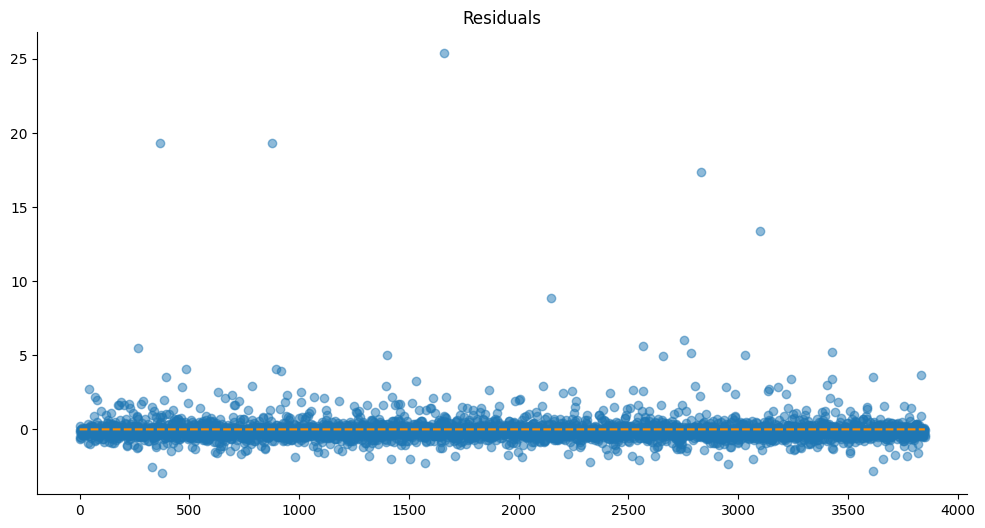

In [ ]:
# Same variance within error terms

def homoscedasticity_assumption(model, features, label):
    """
    Homoscedasticity: Assumes that the errors exhibit constant variance
    """
    print('Assumption : Homoscedasticity of Error Terms(Error terms have the same variance)', '\n')
    
    print('Residuals should have relative constant variance')
        
    # Calculating residuals for the plot
    df_results = calculate_residuals(model, features, label)

    # Plotting the residuals
    plt.subplots(figsize=(12, 6))
    ax = plt.subplot(111)  # To remove spines
    plt.scatter(x=df_results.index, y=df_results.Residuals, alpha=0.5)
    plt.plot(np.repeat(0, df_results.index.max()), color='darkorange', linestyle='--')
    ax.spines['right'].set_visible(False)  # Removing the right spine
    ax.spines['top'].set_visible(False)  # Removing the top spine
    plt.title('Residuals')
    plt.show()

homoscedasticity_assumption(mlr,x_trn,y_trn)

In [ ]:
def multicollinearity_assumption(model, features, label, feature_names=None):
    """
    Multicollinearity: Assumes that predictors are not correlated with each other. If there is
                       correlation among the predictors, then either remove prepdictors with high
                       Variance Inflation Factor (VIF) values or perform dimensionality reduction
                           
                       This assumption being violated causes issues with interpretability of the 
                       coefficients and the standard errors of the coefficients.
    """
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    print('Assumption : Little to no multicollinearity among predictors')

    
    """
    # Plotting the heatmap
    plt.figure(figsize = (10,8))
    sns.heatmap(pd.DataFrame(features, columns=feature_names).corr(), annot=True)
    plt.title('Correlation of Variables')
    plt.show()
        
    print('Variance Inflation Factors (VIF)')
    print('> 10: An indication that multicollinearity may be present')
    print('> 100: Certain multicollinearity among the variables')
    print('-------------------------------------')
    """
    

    # Gathering the VIF for each variable
    VIF = [variance_inflation_factor(features, i) for i in range(features.shape[1])]
    for idx, vif in enumerate(VIF):
        print('{0}: {1}'.format(feature_names[idx], vif))
        
    # Gathering and printing total cases of possible or definite multicollinearity
    possible_multicollinearity = sum([1 for vif in VIF if vif > 10])
    definite_multicollinearity = sum([1 for vif in VIF if vif > 100])
    print()
    print('{0} cases of possible multicollinearity'.format(possible_multicollinearity))
    print('{0} cases of definite multicollinearity'.format(definite_multicollinearity))
    print()

    if definite_multicollinearity == 0:
        if possible_multicollinearity == 0:
            print('Assumption satisfied')
        else:
            print('Assumption possibly satisfied')
            print()
            print('Coefficient interpretability may be problematic')
            print('Consider removing variables with a high Variance Inflation Factor (VIF)')

    else:
        print('Assumption not satisfied')
        print()
        print('Coefficient interpretability will be problematic')
        print('Consider removing variables with a high Variance Inflation Factor (VIF)')

feature_names = sales_trn_data.columns[1:]
multicollinearity_assumption(mlr,x_trn,y_trn,feature_names)

Assumption : Little to no multicollinearity among predictors


/content/notebooks/statsmodels/regression/linear_model.py:1754: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


Year_of_Release: 8394.008525371462
Critic_Score: 69.58666491817594
Critic_Count: 7.991191978317888
User_Score: 70.50738660243482
User_Count: 3.688374710573138
Wii: 6.282285679667283
X360: 9.224552399420643
DS: 6.387329681365771
PS: 2.814721527920624
PS2: 14.030165581158885
GBA: 3.738036791404868
PSP: 5.600552941404638
PS3: 7.828280252733382
PC: 4.797862974725744
GC: 5.3952458865482535
PS4: 2.4894532889969248
3DS: 2.637306316717318
XB: 8.118881237617165
XOne: 2.3236159674242787
WiiU: 1.6356231676732458
DC: 1.1463940032350532
Misc: 3.341346573074409
Sports: 7.371520180797837
Puzzle: 1.8818613711878807
Racing: 4.308778383934856
Shooter: 4.822650391429992
Action: 8.556514754737409
Fighting: 3.3156907562914464
Simulation: 2.482978941789623
Platform: 3.2280532097627526
Role-Playing: 4.484744355126311
Adventure: 2.440962072749636
Nintendo: 156.07926595361064
Microsoft Game Studios: 63.22969779459411
Sony Computer Entertainment: 168.90246256847885
Ubisoft: 260.91381457417936
Electronic Arts: 5

### p-value

In [ ]:
import statsmodels.api as sm

results=sm.OLS(y_trn,sm.add_constant(x_trn)).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.247
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     5.058
Date:                Thu, 06 Apr 2023   Prob (F-statistic):          6.09e-105
Time:                        10:27:17   Log-Likelihood:                -5245.6
No. Observations:                3852   AIC:                         1.096e+04
Df Residuals:                    3616   BIC:                         1.244e+04
Df Model:                         235                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         93.6995     18.912      4.954      0.000      56.619     130.780
x1            -0.0464      0.009     -4.974      0.000      -0.065      -0.028
x2             0.0062      0.002      3.339      0.001       0.003       0.010
x3             0.0024      0.001      1.601      0.109      -0.001       0.005
x4            -0.0242      0.018     -1.358      0.175      -0.059       0.011
x5             0.0084      0.001     14.861      0.000       0.007       0.010
x6             0.6110      0.147      4.148      0.000       0.322       0.900
x7             0.0654      0.143      0.457      0.647      -0.215       0.346
x8             0.3165      0.153      2.062      0.039       0.016       0.617
x9             0.3059      0.210      1.457      0.145      -0.106       0.718
x10            0.2922      0.156      1.874      0.061      -0.013       0.598
x11           -0.0539      0.180     -0.300      0.765      -0.407       0.299
x12            0.2425      0.151      1.610      0.108      -0.053       0.538
x13            0.1721      0.139      1.235      0.217      -0.101       0.445
x14           -0.4359      0.158     -2.750      0.006      -0.747      -0.125
x15           -0.2107      0.168     -1.257      0.209      -0.539       0.118
x16            0.0068      0.169      0.040      0.968      -0.325       0.339
x17           -0.1152      0.167     -0.690      0.490      -0.443       0.212
x18           -0.0393      0.162     -0.243      0.808      -0.357       0.279
x19           -0.0192      0.177     -0.108      0.914      -0.366       0.327
x20           -0.3757      0.211     -1.783      0.075      -0.789       0.037
x21           -0.3321      0.441     -0.754      0.451      -1.196       0.532
x22            0.8005      0.115      6.974      0.000       0.575       1.026
x23            0.4050      0.107      3.799      0.000       0.196       0.614
x24            0.2184      0.154      1.414      0.158      -0.085       0.521
x25            0.2789      0.109      2.558      0.011       0.065       0.493
x26            0.2109      0.107      1.966      0.049       0.001       0.421
x27            0.2914      0.097      2.993      0.003       0.100       0.482
x28            0.3706      0.114      3.243      0.001       0.147       0.595
x29            0.3725      0.116      3.199      0.001       0.144       0.601
x30            0.1840      0.115      1.603      0.109      -0.041       0.409
x31           -0.0281      0.108     -0.261      0.794      -0.239       0.183
x32            0.0437      0.124      0.351      0.726      -0.200       0.288
x33            0.6116      0.989      0.619      0.536      -1.327       2.550
x34           -0.5612      0.993     -0.565      0.572      -2.509       1.387
x35           -0.7050      0.988     -0.713      0.476      -2.643       1.233
x3

### Prediction performance of the regression model

In [ ]:

# Performance Measure
x_test = sales_valid_data.iloc[:,1:]
y_test = sales_valid_data.iloc[:,0]

y_pred = mlr.predict(x_test)
result_dict['game'] = perf_eval_reg(y_test,y_pred)
dataset_names = ['Game Sales']
metric_names = ['RMSE','MAE','MAPE']
display_result(result_dict, dataset_names, metric_names)


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


,RMSE,MAE,MAPE
Game Sales,2.437496e+09,1.164441e+08,9.938059e+07


#Final variables

In [ ]:
sales_mlr_data2 = sales_mlr_data.iloc[:,[0,1,2,5]]
sales_trn_data2, sales_valid_data2 = train_test_split(sales_mlr_data2,test_size=test_size,random_state=seed)
x_trn2 = sales_trn_data2.iloc[:,1:].to_numpy()
y_trn2 = sales_trn_data2.loc[:,'Global_Sales'].to_numpy()

sales_trn_data2

,Global_Sales,Year_of_Release,Critic_Score,User_Count
3030,0.22,2005.0,75.0,15.0
5378,0.02,2006.0,71.0,11.0
2066,0.41,2010.0,75.0,32.0
...,...,...,...,...
2177,0.38,2010.0,83.0,127.0
3557,0.16,2011.0,64.0,10.0
4578,0.08,2008.0,75.0,4.0


In [ ]:
# Train the model with trainset
mlr.fit(x_trn2,y_trn2)

# Get R-squared value
mlr.score(x_trn2,y_trn2)

adr2 = 1-(1-mlr.score(x_trn2,y_trn2))*(x_trn2.shape[0] - 1)/(x_trn2.shape[0] - x_trn2.shape[1]- 1)
adr2

0.08417117859649736

Assumption : Linear Relationship between the Target and the Feature 

Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


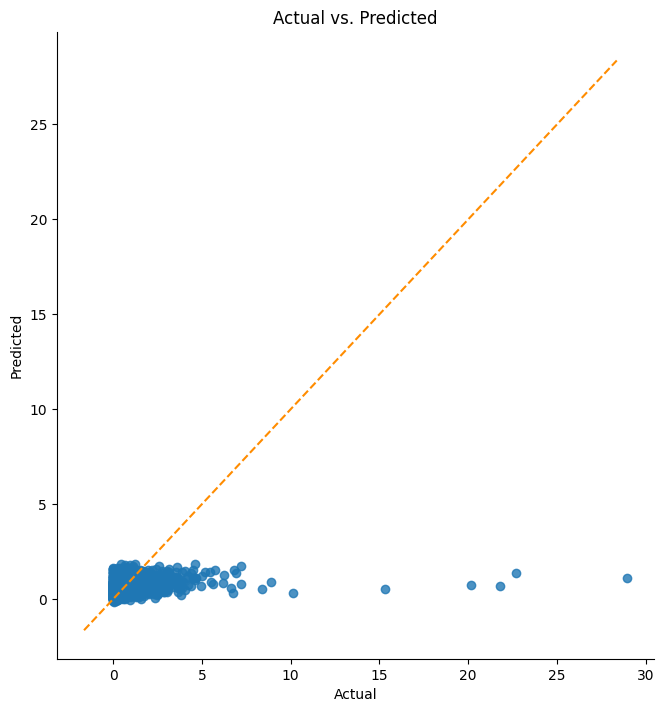

Assumption : The error terms are normally distributed 

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 0.0
Residuals are not normally distributed


/content/notebooks/statsmodels/stats/_adnorm.py:70: RuntimeWarning: divide by zero encountered in log1p
  s = np.sum((2 * i[sl1] - 1.0) / nobs * (np.log(z) + np.log1p(-z[sl2])),
<ipython-input-77-c2618e6455be>:31: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_results['Residuals'])


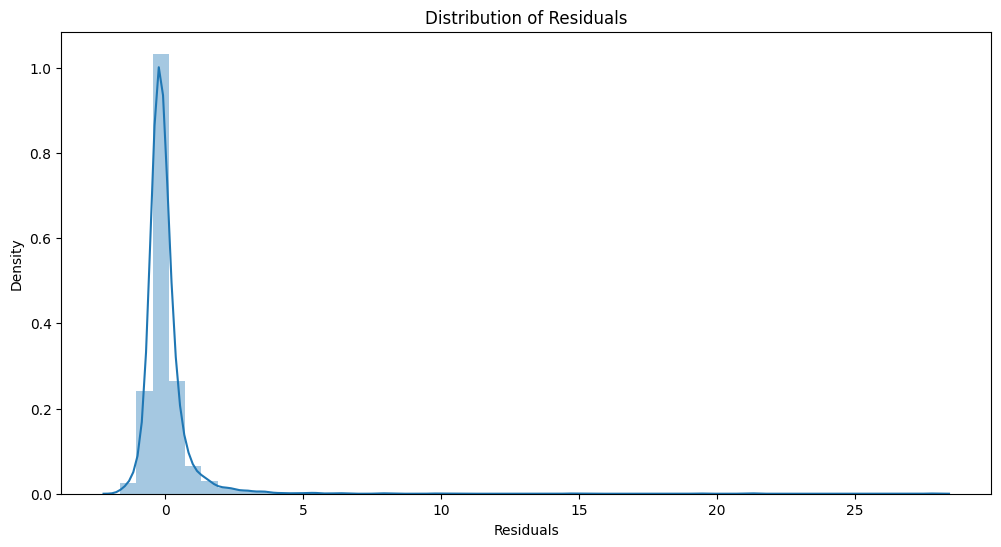


Assumption not satisfied

Confidence intervals will likely be affected
Try performing nonlinear transformations on variables


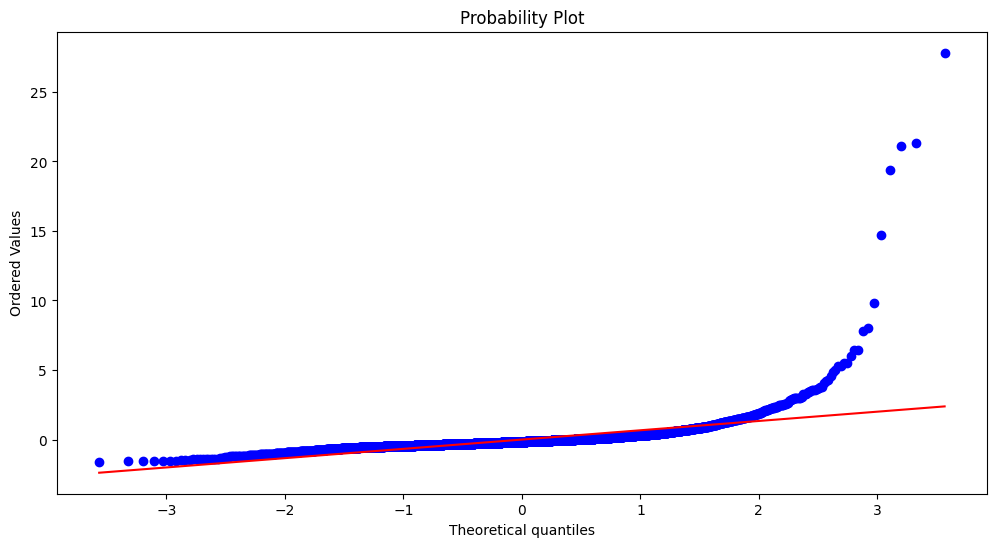

Assumption : Little to no multicollinearity among predictors
Global_Sales: 34.927681640395654
Year_of_Release: 37.66835496287511
Critic_Score: 2.0538977001637733

2 cases of possible multicollinearity
0 cases of definite multicollinearity

Assumption possibly satisfied

Coefficient interpretability may be problematic
Consider removing variables with a high Variance Inflation Factor (VIF)
Assumption : No Autocorrelation in the residuals 


Performing Durbin-Watson Test
Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data
0 to 2< is positive autocorrelation
>2 to 4 is negative autocorrelation
-------------------------------------
Durbin-Watson: 2.0201075502896946
Little to no autocorrelation 

Assumption satisfied
Assumption : Homoscedasticity of Error Terms(Error terms have the same variance) 

Residuals should have relative constant variance


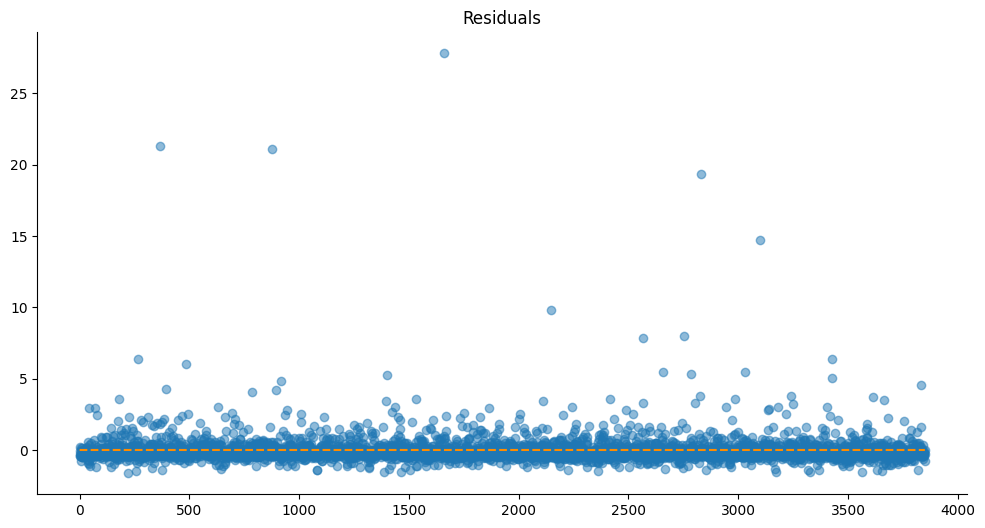

In [ ]:
linear_assumption(mlr,x_trn2,y_trn2)
normal_errors_assumption(mlr,x_trn2,y_trn2)
QQplot(mlr, x_trn2,y_trn2)
feature_names = sales_trn_data2.columns[:-1]
multicollinearity_assumption(mlr,x_trn2,y_trn2,feature_names)
autocorrelation_assumption(mlr,x_trn2,y_trn2)
homoscedasticity_assumption(mlr,x_trn2,y_trn2)

In [ ]:
x_test2 = sales_valid_data2.iloc[:,:-1]
y_test2 = sales_valid_data2.iloc[:,-1]

y_pred2 = mlr.predict(x_test2)
result_dict['game2'] = perf_eval_reg(y_test2,y_pred2)
dataset_names = ['Game Sales','Game Sales2']
metric_names = ['RMSE','MAE','MAPE']
display_result(result_dict, dataset_names, metric_names)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


,RMSE,MAE,MAPE
Game Sales,2.437496e+09,1.164441e+08,9.938059e+07
Game Sales2,6.293527e+01,5.875806e+01,5.063442e+00
